## Example of CNN - Fashion_MNIST classification

### load libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras

Using TensorFlow backend.


## load data

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [ ]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

show image

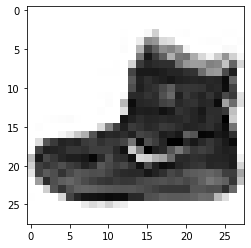

In [ ]:
plt.imshow(x_train[0],cmap='Greys')

In [ ]:
classlabel = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
'''

'\n0\tT-shirt/top\n1\tTrouser\n2\tPullover\n3\tDress\n4\tCoat\n5\tSandal\n6\tShirt\n7\tSneaker\n8\tBag\n9\tAnkle boot\n'

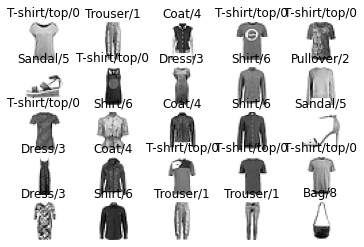

In [ ]:
j = 1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(x_train[i],cmap="Greys")
  plt.axis('off')
  plt.title('{}/{}'.format(classlabel[y_train[i]], y_train[i])) 

### show dimention

In [ ]:
x_train.ndim

3

### create dat for valdation

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_vel,y_train,y_vel = train_test_split(x_train,y_train,test_size=0.2,random_state = 2020)


## converted to 4 dim(require for cnn)

In [ ]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
x_vel = np.expand_dims(x_vel,-1)

In [ ]:
x_train.ndim

4

### feature scaling

In [ ]:
x_train = x_train/255
x_test = x_test/255
x_vel = x_vel/255

### build convolutional neural network

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape = [28,28,1]),
                                 keras.layers.MaxPool2D(pool_size=(2, 2)),
                                 keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape = [28,28,1]),
                                 keras.layers.MaxPool2D(pool_size=(2, 2)),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=128,activation='relu'),
                                 keras.layers.Dense(units=10,activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,batch_size=512,epochs=100,verbose=1,validation_data=(x_vel,y_vel))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 8s 168us/step - loss: 0.9069 - accuracy: 0.6966 - val_loss: 0.5505 - val_accuracy: 0.7906
Epoch 2/100
48000/48000 [==============================] - 2s 40us/step - loss: 0.4970 - accuracy: 0.8175 - val_loss: 0.4567 - val_accuracy: 0.8316
Epoch 3/100
48000/48000 [==============================] - 2s 40us/step - loss: 0.4228 - accuracy: 0.8492 - val_loss: 0.4291 - val_accuracy: 0.8413
Epoch 4/100
48000/48000 [==============================] - 2s 39us/step - loss: 0.3899 - accuracy: 0.8611 - val_loss: 0.3858 - val_accuracy: 0.8625
Epoch 5/100
48000/48000 [==============================] - 2s 40us/step - loss: 0.3671 - accuracy: 0.8687 - val_loss: 0.3746 - val_accuracy: 0.8657
Epoch 6/100
48000/48000 [==============================] - 2s 39us/step - loss: 0.3458 - accuracy: 0.8766 - val_loss: 0.3528 - val_accuracy: 0.8744
Epoch 7/100
48000/48000 [==============================] - 2s

### model test and predict 

posibilities among 10 

In [ ]:
model.predict(np.expand_dims(x_test[0],axis=0)).round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

selectd prediction

In [ ]:
np.argmax(model.predict(np.expand_dims(x_test[0],axis=0)).round(2))

9

In [ ]:
y_test[0]

9

predict all y_test

In [ ]:
y_pred = model.predict(x_test).round(2)

In [ ]:
y_pred

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.16, 0.  ]], dtype=float32)

evaluate model to chech accurecy

In [ ]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 91us/step


[0.5152031939864159, 0.9063000082969666]

show predicted picture image

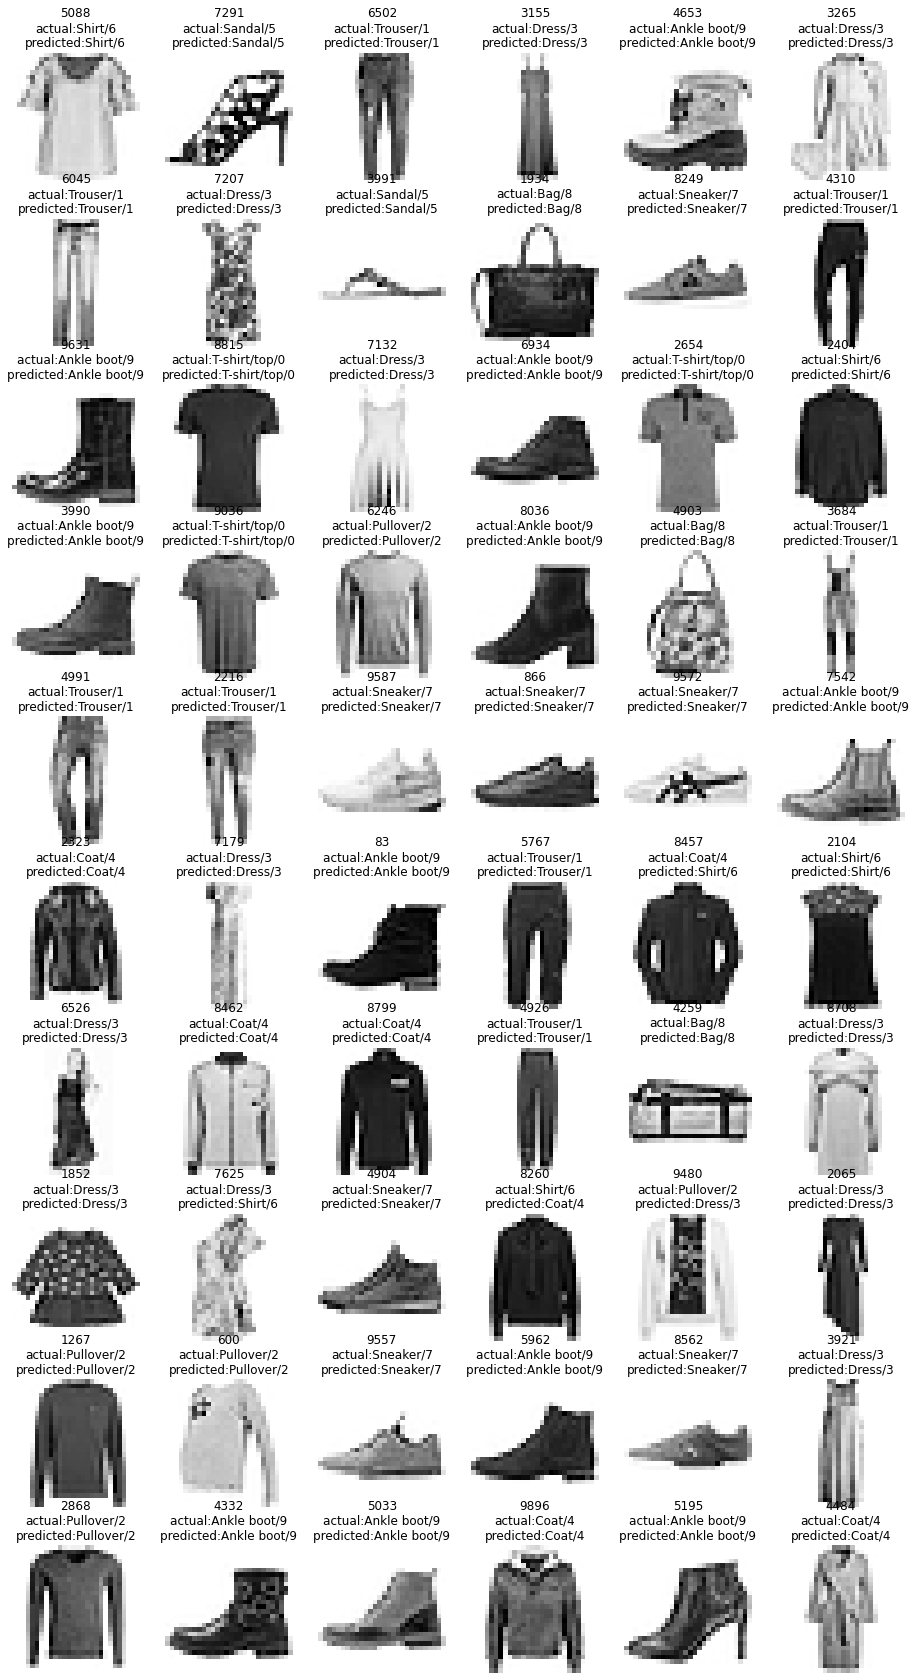

In [ ]:
plt.figure(figsize=(16,30))

j = 1
for i in np.random.randint(0,10000,60):
  plt.subplot(10,6,j);j += 1
  plt.imshow(x_test[i].reshape(28,28),cmap='Greys')
  plt.title('{}\nactual:{}/{}\npredicted:{}/{}'.format(i,classlabel[y_test[i]], y_test[i],classlabel[np.argmax(y_pred[i])], np.argmax(y_pred[i]))) 
  plt.axis('off')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


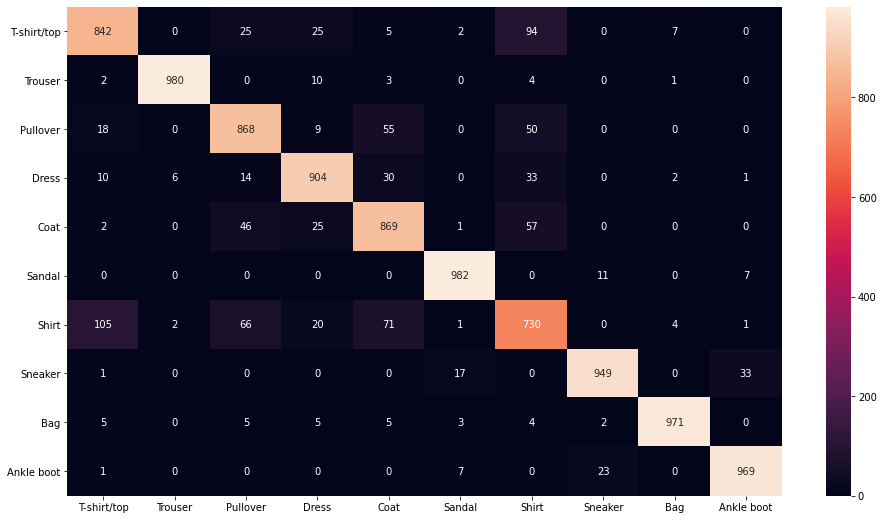

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_label = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_label)

import seaborn as sns
sns.heatmap(cm,fmt ="d",annot=True,xticklabels=classlabel,yticklabels=classlabel)

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred_label,target_names = classlabel)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.84      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.85      0.87      0.86      1000
       Dress       0.91      0.90      0.90      1000
        Coat       0.84      0.87      0.85      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.75      0.73      0.74      1000
     Sneaker       0.96      0.95      0.96      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



### save model

In [ ]:
path = '/content/drive/My Drive/machine learning/neural network/convolutional neural network/fashion_classification_cnn.h'

model.save(path)

In [ ]:
model_deploy = keras.models.load_model('/content/drive/My Drive/machine learning/neural network/convolutional neural network/fashion_classification_cnn.h')

In [ ]:
model_deploy.predict(np.expand_dims(x_test[0],axis=0)).round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
np.argmax(model_deploy.predict(np.expand_dims(x_test[0],axis=0)).round(2))

9

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape = [28,28,1]),
                                 keras.layers.MaxPool2D(pool_size=(2, 2)),
                                 keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape = [28,28,1]),
                                 keras.layers.MaxPool2D(pool_size=(2, 2)),
                                 keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape = [28,28,1]),
                                 keras.layers.MaxPool2D(pool_size=(2, 2)),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=128,activation='relu'),
                                 keras.layers.Dropout(0.25),
                                 keras.layers.Dense(units=256,activation='relu'),
                                 keras.layers.Dropout(0.25),
                                 keras.layers.Dense(units=128,activation='relu'),
                                 keras.layers.Dropout(0.25),
                                 keras.layers.Dense(units=10,activation='softmax'),
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,batch_size=512,epochs=100,verbose=1,validation_data=(x_vel,y_vel))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 3s 56us/step - loss: 1.2922 - accuracy: 0.4973 - val_loss: 0.7558 - val_accuracy: 0.7202
Epoch 2/100
48000/48000 [==============================] - 2s 45us/step - loss: 0.7281 - accuracy: 0.7282 - val_loss: 0.6139 - val_accuracy: 0.7661
Epoch 3/100
48000/48000 [==============================] - 2s 45us/step - loss: 0.6079 - accuracy: 0.7761 - val_loss: 0.5442 - val_accuracy: 0.7943
Epoch 4/100
48000/48000 [==============================] - 2s 45us/step - loss: 0.5473 - accuracy: 0.8013 - val_loss: 0.4943 - val_accuracy: 0.8185
Epoch 5/100
48000/48000 [==============================] - 2s 44us/step - loss: 0.5016 - accuracy: 0.8185 - val_loss: 0.4648 - val_accuracy: 0.8282
Epoch 6/100
48000/48000 [==============================] - 2s 45us/step - loss: 0.4680 - accuracy: 0.8324 - val_loss: 0.4375 - val_accuracy: 0.8378
Epoch 7/100
48000/48000 [==============================] - 2s 